In [22]:
from sklearn import datasets
import pandas as pd
import numpy as np
from sklearn.svm import SVC
import matplotlib.pyplot as plt

noisy_circles = datasets.make_circles(n_samples=200, factor=0.5, noise=0.05, random_state=170)
noisy_circles

(array([[-0.16400476, -0.44457633],
        [-0.38735906,  0.41330515],
        [-0.4456656 ,  0.81886681],
        [ 0.39248699,  0.34901148],
        [ 0.44956302, -0.13095391],
        [ 0.89161199, -0.54666226],
        [ 0.96438425,  0.42823354],
        [ 0.1623054 ,  0.3930988 ],
        [ 0.1006359 , -0.44272266],
        [ 0.90358962,  0.39681165],
        [ 0.46317312,  0.13303312],
        [ 0.07810446,  0.46422538],
        [-0.34902005,  0.31553735],
        [-0.71051145, -0.78942791],
        [-0.27074622, -0.30561477],
        [ 0.54007002, -0.07692153],
        [-0.27459525,  0.42791854],
        [-0.57809009,  0.82652682],
        [-0.38730644, -0.24580878],
        [-0.90056182, -0.1135711 ],
        [-0.34951315,  0.95001999],
        [ 0.4827936 , -0.07619486],
        [ 0.48325803,  0.0883459 ],
        [-0.10154384,  0.50760335],
        [-0.42935462, -0.20966305],
        [-0.35538749,  0.35239605],
        [ 0.47208299, -0.19023654],
        [-0.59000672,  0.038

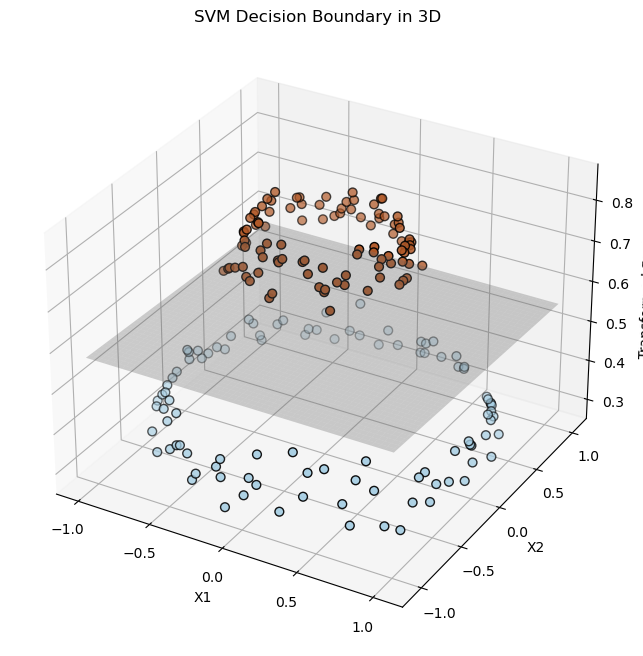

In [23]:
X, y = noisy_circles

# Sử dụng kernel RBF (radial basis function) để chuyển dữ liệu vào không gian cao hơn
X_trans = np.column_stack((X[:, 0], X[:, 1], np.exp(-(X[:, 0] ** 2 + X[:, 1] ** 2))))

# Tạo mô hình SVM
clf = SVC(kernel='linear', C=1)
clf.fit(X_trans, y)

# Tạo dữ liệu cho đường biên
xx, yy = np.meshgrid(np.linspace(X[:, 0].min(), X[:, 0].max(), 100),
                     np.linspace(X[:, 1].min(), X[:, 1].max(), 100))
zz = -(clf.coef_[0][0] * xx + clf.coef_[0][1] * yy + clf.intercept_) / clf.coef_[0][2]

# Vẽ biểu đồ 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:, 0], X[:, 1], X_trans[:, 2], c=y, cmap=plt.cm.Paired, edgecolors='k', s=40)
ax.plot_surface(xx, yy, zz, color='gray', alpha=0.3)

ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Transformed Feature')

plt.title('SVM Decision Boundary in 3D')
plt.show()

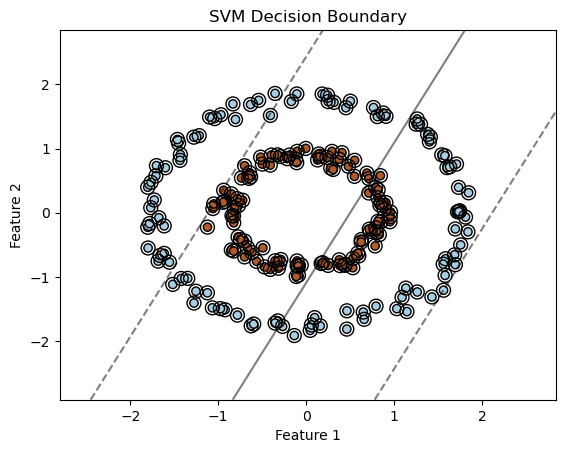

In [24]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
import numpy as np

# Generate noisy circles data
noisy_circles = datasets.make_circles(n_samples=200, factor=0.5, noise=0.05, random_state=170)
X, y = noisy_circles

# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Create a SVM classifier
clf = SVC(kernel='linear', C=1.0)
clf.fit(X, y)

# Plot decision boundary
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot data points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k', marker='o')

# Plot decision boundary and margins
plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

# Highlight the support vectors
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='k')

plt.title('SVM Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

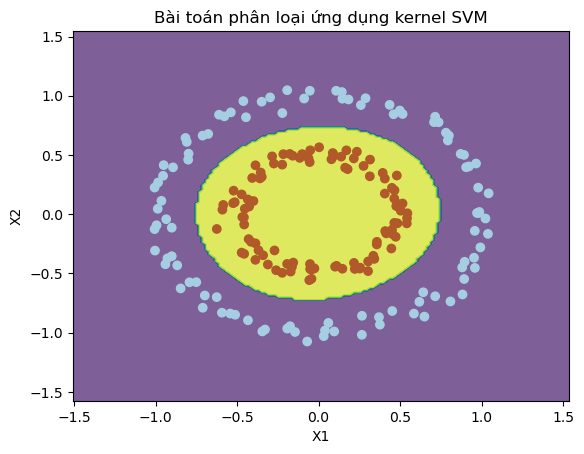

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import svm

# Tạo dữ liệu
noisy_circles = datasets.make_circles(n_samples=200, factor=0.5, noise=0.05, random_state=170)
X = noisy_circles[0]
y = noisy_circles[1]

# Tạo mô hình SVM với kernel RBF
model = svm.SVC(kernel='rbf', C=1, gamma='scale')

# Huấn luyện mô hình
model.fit(X, y)

# Tạo lưới để vẽ đường biên
h = 0.02  # Kích thước bước lưới
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Dự đoán nhãn cho từng điểm trong lưới
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Vẽ biểu đồ dữ liệu và đường biên phân loại
plt.contourf(xx, yy, Z, alpha=0.7)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Bài toán phân loại ứng dụng kernel SVM')
plt.show()